# Regional Heterogeneity: Varying Economic Performance in US Counties

## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

#### Data sources: 

The main dataset we will be using in this notebook is ["CAGDP9: Real GDP in Chained Dollars by County and MSA"](https://apps.bea.gov/regional/downloadzip.cfm) by the Bureau of Economic Analysis (BEA). It offers a comprehensive measure of the gross domestic product of counties, metropolitan statistical areas, and some other local areas in the United States from 2001 till now. Accessed in Jun 2022. 

We will also use ["United States Counties Database"](https://simplemaps.com/data/us-counties) by Simplemaps.com. Specifically, we will use the geographical data of U.S. counties (i.e. latitude and longitude) to produce visualizations in the last section. Accessed in Jun 2022. 

## Part 1: Import dataset

Datasets are encoded in different codecs. In most cases, the default codex (utf-8) will be able to process the datasets. But in other cases, if we run into some issues with decoding (especially with datasets containing symbols or other languages), we can manually specify other codecs (e.g. ascii, latin-1). A complete list of codecs for Python 3.7 and newer can be found [here](https://docs.python.org/3.7/library/codecs.html#standard-encodings). 

Also, when we want to export the dataframe after we are done, we will also want to make sure that we are using the right codecs.

We have got an immediate example here. Our real GDP dataset by BEA cannot be decoded with the default codecs (utf-8). 

```python
>>> rgdp = pd.read_csv("../data/CAGDP9__ALL_AREAS_2001_2020.csv")
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf1 in position 137852: invalid continuation byte
```

So, we will switch to latin-1 manually. 

In [2]:
rgdp = pd.read_csv("../data/CAGDP9__ALL_AREAS_2001_2020.csv", encoding="latin-1")
rgdp

C:\Users\Yiyan\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,2001,2002,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,"""00000""",United States,,CAGDP9,1.0,...,All industry total,Thousands of chained 2012 dollars,13263417000,13488357000,...,15891534000,16253970000,16553348000,16932051000,17390295000,17680274000,18079084000,18606787000,19032672000,18384687000
1,"""00000""",United States,,CAGDP9,2.0,...,Private industries,Thousands of chained 2012 dollars,11452473000,11651910000,...,13747760000,14094484000,14359460000,14745226000,15197800000,15468414000,15852630000,16358199000,16773564000,16142272000
2,"""00000""",United States,,CAGDP9,3.0,11,"Agriculture, forestry, fishing and hunting",Thousands of chained 2012 dollars,154754000,160443000,...,184277000,178689000,207512000,208573000,221860000,234553000,231022000,237898000,223343000,254650000
3,"""00000""",United States,,CAGDP9,6.0,21,"Mining, quarrying, and oil and gas extraction",Thousands of chained 2012 dollars,272249000,279759000,...,322257000,360523000,374021000,414501000,451234000,427227000,436020000,436723000,488271000,438565000
4,"""00000""",United States,,CAGDP9,10.0,22,Utilities,Thousands of chained 2012 dollars,214832000,222238000,...,276943000,280650000,277156000,266289000,266387000,280734000,284085000,283106000,286552000,298558000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108051,"""98000""",Far West,8.0,CAGDP9,92.0,...,Private services-providing industries 3/,Thousands of chained 2012 dollars,1564289870,1608644362,...,1990300228,2043087768,2099960167,2169518763,2267778505,2339057085,2456138729,2568635335,2670273983,2570880841
108052,Note: See the included footnote file.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108053,CAGDP9: Real GDP by county and metropolitan ar...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108054,"Last updated: December 8, 2021 -- new statisti...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here we see the last four rows are just some footnotes, so we will drop them. To do so, we can either select the top 108052 rows for the data that we want, or we can drop the bottom 4 rows with `drop`.

**Method 1: Select rows between a and b**
```python
data[a, b]
```
or
```python
data.iloc[a, b]
```

In [3]:
# rgdp[0:108052]

**Method 2: Drop rows between c to d**
```python
data.drop(data.index[c:d], axis=0)
```

In [4]:
rgdp = rgdp.drop(rgdp.index[-4:], axis=0)
rgdp

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,2001,2002,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,"""00000""",United States,,CAGDP9,1.0,...,All industry total,Thousands of chained 2012 dollars,13263417000,13488357000,...,15891534000,16253970000,16553348000,16932051000,17390295000,17680274000,18079084000,18606787000,19032672000,18384687000
1,"""00000""",United States,,CAGDP9,2.0,...,Private industries,Thousands of chained 2012 dollars,11452473000,11651910000,...,13747760000,14094484000,14359460000,14745226000,15197800000,15468414000,15852630000,16358199000,16773564000,16142272000
2,"""00000""",United States,,CAGDP9,3.0,11,"Agriculture, forestry, fishing and hunting",Thousands of chained 2012 dollars,154754000,160443000,...,184277000,178689000,207512000,208573000,221860000,234553000,231022000,237898000,223343000,254650000
3,"""00000""",United States,,CAGDP9,6.0,21,"Mining, quarrying, and oil and gas extraction",Thousands of chained 2012 dollars,272249000,279759000,...,322257000,360523000,374021000,414501000,451234000,427227000,436020000,436723000,488271000,438565000
4,"""00000""",United States,,CAGDP9,10.0,22,Utilities,Thousands of chained 2012 dollars,214832000,222238000,...,276943000,280650000,277156000,266289000,266387000,280734000,284085000,283106000,286552000,298558000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108047,"""98000""",Far West,8.0,CAGDP9,88.0,"42, 44-45",Trade,Thousands of chained 2012 dollars,299948334,310133752,...,334015074,337467786,349876101,365797315,388328048,391594880,407930747,417922582,430420400,417100557
108048,"""98000""",Far West,8.0,CAGDP9,89.0,"22, 48-49",Transportation and utilities,Thousands of chained 2012 dollars,92348610,98270500,...,120757328,120910902,122603598,122964944,126603943,135513257,143982835,149511990,157153056,142336514
108049,"""98000""",Far West,8.0,CAGDP9,90.0,"31-33, 51",Manufacturing and information,Thousands of chained 2012 dollars,332347411,334231144,...,526989191,537865474,587660055,619211964,671787004,711230142,778240248,838292659,893126941,919323956
108050,"""98000""",Far West,8.0,CAGDP9,91.0,...,Private goods-producing industries 2/,Thousands of chained 2012 dollars,416108373,409007552,...,500612965,517109694,537204262,557275562,587813867,604985303,640423400,674839219,695172659,693249584


## Part 2: Learn about the dataset

One of the first things that we will do with our dataset is to learn about its structure: how many rows and columns are there in the dataset? What values does each column store? What is the data type for each column (int, string, etc.)? For categorical variables, what are unique values? For numerical variables, what is the mean, median, min, and max? 

Pandas has many built-in functions to allow us quickly answer the question above. 

#### Size of the dataset

In [5]:
rgdp.shape

(108052, 28)

#### Column names

In [6]:
rgdp.columns

Index(['GeoFIPS', 'GeoName', 'Region', 'TableName', 'LineCode',
       'IndustryClassification', 'Description', 'Unit', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

#### Number of counties

In [7]:
len(rgdp["GeoFIPS"].unique())

3178

#### Industry labels

How does the original dataset use indentation to structure the industries?

In [8]:
for industry in rgdp["Description"].unique():
    print(industry)

All industry total
 Private industries
  Agriculture, forestry, fishing and hunting
  Mining, quarrying, and oil and gas extraction
  Utilities
  Construction
  Manufacturing
   Durable goods manufacturing
   Nondurable goods manufacturing
  Wholesale trade
  Retail trade
  Transportation and warehousing
  Information
  Finance, insurance, real estate, rental, and leasing
   Finance and insurance
   Real estate and rental and leasing
  Professional and business services
   Professional, scientific, and technical services
   Management of companies and enterprises
   Administrative and support and waste management and remediation services
  Educational services, health care, and social assistance
   Educational services
   Health care and social assistance
  Arts, entertainment, recreation, accommodation, and food services
   Arts, entertainment, and recreation
   Accommodation and food services
  Other services (except government and government enterprises)
Government and government en

In [9]:
len(rgdp["Description"].unique())

34

In [10]:
rgdp.describe()

,LineCode
count,108052.000000
mean,52.264706
std,30.338729
min,1.000000
25%,25.000000
50%,59.500000
75%,79.000000
max,92.000000


#### Data types

Some columns are strings.

In [11]:
rgdp["GeoFIPS"]

0          "00000"
1          "00000"
2          "00000"
3          "00000"
4          "00000"
            ...   
108047     "98000"
108048     "98000"
108049     "98000"
108050     "98000"
108051     "98000"
Name: GeoFIPS, Length: 108052, dtype: object

In [12]:
rgdp["GeoName"]

0         United States
1         United States
2         United States
3         United States
4         United States
              ...      
108047         Far West
108048         Far West
108049         Far West
108050         Far West
108051         Far West
Name: GeoName, Length: 108052, dtype: object

Some columns should be numeric, but have mixed types. 

In [13]:
rgdp["2001"]

0         13263417000
1         11452473000
2           154754000
3           272249000
4           214832000
             ...     
108047      299948334
108048       92348610
108049      332347411
108050      416108373
108051     1564289870
Name: 2001, Length: 108052, dtype: object

### Exploratory Data Anaylsis with pandas-profiling

In addition, we can also rely on other wonderful python packages to get a big picture of our dataset. As an example, the [pandas-profiling](https://pandas-profiling.ydata.ai/docs/master/index.html) package "generates profile reports from a pandas DataFrame. The pandas `df.describe()` function is handy yet a little basic for exploratory data analysis. pandas-profiling extends pandas DataFrame with `df.profile_report()`, which automatically generates a standardized univariate and multivariate report for data understanding." 

In a way, pandas-profiling can do most of the exploratory data analysis tasks and create a comprehensive and beautiful report for you within a minute. 

Copy the following code to a code cell and run it to see the report generated by pandas-profiling if you have the package installed. 

```python
from pandas_profiling import ProfileReport
profile = ProfileReport(rgdp, title="Pandas Profiling Report")
profile.to_notebook_iframe()
```

## Part 3: Missing Values and NaNs

The difference between data found in many tutorials and data in the real world is that real-world data is rarely clean and homogeneous. In particular, many interesting datasets will have some amount of data missing. To make matters even more complicated, different data sources may indicate missing data in different ways.

**Understanding NaNs:**
Why NaN values exist in out dataset? 

In our dataset, there are two types of "missing values": 
- `(D)`:  Not shown to avoid disclosure of confidential information; estimates are included in higher-level totals.
- `(NA)`:  Not available.

In [14]:
rgdp[rgdp["2001"] == "(D)"][:5]

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,2001,2002,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
75,"""01001""","Autauga, AL",5,CAGDP9,13.0,"321,327-339",Durable goods manufacturing,Thousands of chained 2012 dollars,(D),(D),...,(D),(D),29905,37898,52801,79494,95910,79507,61324,49317
76,"""01001""","Autauga, AL",5,CAGDP9,25.0,"311-316,322-326",Nondurable goods manufacturing,Thousands of chained 2012 dollars,(D),(D),...,(D),(D),154296,180253,179331,174500,171988,181888,153206,167474
86,"""01001""","Autauga, AL",5,CAGDP9,64.0,55,Management of companies and enterprises,Thousands of chained 2012 dollars,(D),(D),...,(D),(D),(D),(D),(D),(D),(D),(D),(D),(D)
87,"""01001""","Autauga, AL",5,CAGDP9,65.0,56,Administrative and support and waste manage...,Thousands of chained 2012 dollars,(D),(D),...,(D),(D),(D),(D),(D),(D),15187,(D),18404,18687
89,"""01001""","Autauga, AL",5,CAGDP9,69.0,61,Educational services,Thousands of chained 2012 dollars,(D),4405,...,(D),6643,6932,6858,7126,8131,8625,10084,11905,12548


In [15]:
rgdp[rgdp["2001"] == "(NA)"][:5]

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,2001,2002,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
2550,"""02063""","Chugach Census Area, AK*",8,CAGDP9,1.0,...,All industry total,Thousands of chained 2012 dollars,(NA),(NA),...,(NA),(NA),(NA),(NA),(NA),(NA),(NA),(NA),(NA),(NA)
2551,"""02063""","Chugach Census Area, AK*",8,CAGDP9,2.0,...,Private industries,Thousands of chained 2012 dollars,(NA),(NA),...,(NA),(NA),(NA),(NA),(NA),(NA),(NA),(NA),(NA),(NA)
2552,"""02063""","Chugach Census Area, AK*",8,CAGDP9,3.0,11,"Agriculture, forestry, fishing and hunting",Thousands of chained 2012 dollars,(NA),(NA),...,(NA),(NA),(NA),(NA),(NA),(NA),(NA),(NA),(NA),(NA)
2553,"""02063""","Chugach Census Area, AK*",8,CAGDP9,6.0,21,"Mining, quarrying, and oil and gas extraction",Thousands of chained 2012 dollars,(NA),(NA),...,(NA),(NA),(NA),(NA),(NA),(NA),(NA),(NA),(NA),(NA)
2554,"""02063""","Chugach Census Area, AK*",8,CAGDP9,10.0,22,Utilities,Thousands of chained 2012 dollars,(NA),(NA),...,(NA),(NA),(NA),(NA),(NA),(NA),(NA),(NA),(NA),(NA)


**Different ways to deal with NaNs:**
1. Drop the NaNs
2. Replace NaNs with zeros
3. Replace NaNs with the mean or median

There are the convenience methods, `dropna()` (which removes NA values) and `fillna()` (which fills in NA values). 

Sometimes we just simply want to drop the missing values; other times, we would rather replace them with a valid value. This value might be a single number like zero, or it might be some sort of imputation or interpolation from the good values. Those can be the mean, median, modes, or some other values that make sense in the specific case. Missing values also need to be considered case-by-case. 

Here we will simply drop all the NaNs in the dataset. 

In [16]:
rgdp_no_nans = rgdp.copy()
rgdp_no_nans = rgdp_no_nans.replace("(D)", np.nan)
rgdp_no_nans = rgdp_no_nans.replace("(NA)", np.nan)

In [17]:
rgdp_no_nans = rgdp_no_nans.dropna()

## Part 4: String methods and type conversions

Often the data we worked with will not have the desirable data type. For example, the real GDP data we have now has some entries being kept as strings. To convert these data entries to desirable data type, the most common way is to use `pandas.DataFrame.astype(type)`. For example, we can apply `astype("int64")` method to our dataset.

In [18]:
# make a copy of the dataframe first
rgdp_clean = rgdp_no_nans.copy()

### Converting a specified data series

We can convert the series first, and assign it back. 

In [19]:
# understand why this will fail and how to read error message
# stackoverflow is your friend
# rgdp_test["2001"].astype(int)

In [20]:
rgdp_no_nans["2001"].astype("int64")

0         13263417000
1         11452473000
2           154754000
3           272249000
4           214832000
             ...     
108047      299948334
108048       92348610
108049      332347411
108050      416108373
108051     1564289870
Name: 2001, Length: 63143, dtype: int64

In [21]:
for year in np.arange(2001, 2021):
    rgdp_clean[str(year)] = rgdp_no_nans[str(year)].astype("int64")

Or we can convert many columns in a dataframe at once by passing in a dictionary. 

In [22]:
rgdp_no_nans.astype({"2001": "int64", "2002": "int64"})

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,2001,2002,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,"""00000""",United States,,CAGDP9,1.0,...,All industry total,Thousands of chained 2012 dollars,13263417000,13488357000,...,15891534000,16253970000,16553348000,16932051000,17390295000,17680274000,18079084000,18606787000,19032672000,18384687000
1,"""00000""",United States,,CAGDP9,2.0,...,Private industries,Thousands of chained 2012 dollars,11452473000,11651910000,...,13747760000,14094484000,14359460000,14745226000,15197800000,15468414000,15852630000,16358199000,16773564000,16142272000
2,"""00000""",United States,,CAGDP9,3.0,11,"Agriculture, forestry, fishing and hunting",Thousands of chained 2012 dollars,154754000,160443000,...,184277000,178689000,207512000,208573000,221860000,234553000,231022000,237898000,223343000,254650000
3,"""00000""",United States,,CAGDP9,6.0,21,"Mining, quarrying, and oil and gas extraction",Thousands of chained 2012 dollars,272249000,279759000,...,322257000,360523000,374021000,414501000,451234000,427227000,436020000,436723000,488271000,438565000
4,"""00000""",United States,,CAGDP9,10.0,22,Utilities,Thousands of chained 2012 dollars,214832000,222238000,...,276943000,280650000,277156000,266289000,266387000,280734000,284085000,283106000,286552000,298558000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108047,"""98000""",Far West,8.0,CAGDP9,88.0,"42, 44-45",Trade,Thousands of chained 2012 dollars,299948334,310133752,...,334015074,337467786,349876101,365797315,388328048,391594880,407930747,417922582,430420400,417100557
108048,"""98000""",Far West,8.0,CAGDP9,89.0,"22, 48-49",Transportation and utilities,Thousands of chained 2012 dollars,92348610,98270500,...,120757328,120910902,122603598,122964944,126603943,135513257,143982835,149511990,157153056,142336514
108049,"""98000""",Far West,8.0,CAGDP9,90.0,"31-33, 51",Manufacturing and information,Thousands of chained 2012 dollars,332347411,334231144,...,526989191,537865474,587660055,619211964,671787004,711230142,778240248,838292659,893126941,919323956
108050,"""98000""",Far West,8.0,CAGDP9,91.0,...,Private goods-producing industries 2/,Thousands of chained 2012 dollars,416108373,409007552,...,500612965,517109694,537204262,557275562,587813867,604985303,640423400,674839219,695172659,693249584


In [23]:
rgdp_no_nans.astype({"2001": "int64", "2002": "int64"}).dtypes

GeoFIPS                    object
GeoName                    object
Region                     object
TableName                  object
LineCode                  float64
IndustryClassification     object
Description                object
Unit                       object
2001                        int64
2002                        int64
2003                       object
2004                       object
2005                       object
2006                       object
2007                       object
2008                       object
2009                       object
2010                       object
2011                       object
2012                       object
2013                       object
2014                       object
2015                       object
2016                       object
2017                       object
2018                       object
2019                       object
2020                       object
dtype: object

Now we can see the `dtype` for 2001 and 2002 are `int64`.  

### Converting the entire dataframe

Alternatively, we can convert the entire dataframe to a data type if we want. 

In [24]:
sample_df = pd.DataFrame({"e": ["1", "4", "8"], 
                          "c": ["1", "4", "8"], 
                          "o": [1, 4, 8], 
                          "n": [1.0, 4.0, 8.0]
                         })
sample_df

,e,c,o,n
0,1,1,1,1.0
1,4,4,4,4.0
2,8,8,8,8.0


In [25]:
sample_df.astype(int)

,e,c,o,n
0,1,1,1,1
1,4,4,4,4
2,8,8,8,8


We can also convert data type into `float`, `str`, etc. using the `astype` method on the entire dataframe or some specified data series. Pandas also provides a `pandas.to_numeric()` function to easier convert different data types into numeric. 

### Vectorized functions and custom type conversion functions

But sometimes the dataset entries may be harder to convert to numerical values, and the easy way `astype` can give you errors. So it is also important to know what data entries the conversion is stuck on, or simply write a custom data type conversion function yourself. 

One of the most useful numpy function is `numpy.vectorize`. It takes a simple function with one argument and returns a function that can apply this function to every element to a numpy array. 

Here is a simple example to illustrate this point. 

```python
def add_one(x):
    return x + 1
v_add_one = np.vectorize(add_one)

some_array = np.array([1, 4, 8])
v_add_one(some_array)
>>> array([2, 5, 9])
```

Here the vectorized function `v_add_one` applies `add_one` to every element in the array. But keep in mind that `np.vectorize` is just a convenience function. It does not make your code run faster. So if it is not convenient to write a function and vectorize it, a for loop or a while loop is always your friend. 

No, we will do the conversion with `convert2int` and its vectorized form. 

In [26]:
def convert2int(s):
    try:
        return int(s)
    except:
        return s

In [27]:
v_convert2int = np.vectorize(convert2int)

In [28]:
v_convert2int(rgdp_no_nans["2001"])

array([13263417000, 11452473000,   154754000, ...,   332347411,
         416108373,  1564289870], dtype=int64)

In [29]:
for col in ["Region", "LineCode"]:
    rgdp_clean[col] = v_convert2int(rgdp_no_nans[col])

### Regular Expressions and Strings

But sometimes the data entries require some manipulation before can be converted to the desirable data types easily. For example, entries in the `GeoFIPS` column in our dataset has the following form. 

In [30]:
rgdp_no_nans["GeoFIPS"]

0          "00000"
1          "00000"
2          "00000"
3          "00000"
4          "00000"
            ...   
108047     "98000"
108048     "98000"
108049     "98000"
108050     "98000"
108051     "98000"
Name: GeoFIPS, Length: 63143, dtype: object

Note that the parentheses are there in the data, so simple conversion like `astype(int)` will fail.

In [31]:
# this will produce an error
# rgdp_no_nans["GeoFIPS"].astype("int64")

To extract relevant information, we will use regular expressions. A regular expression is a sequence of characters that specifies a search pattern in text. Usually such patterns are used by string-searching algorithms for "find" or "find and replace" operations on strings, or for input validation.

For example, we can extract student ID among a bunch of other texts. 

In [32]:
import re
some_text = "Name: Oski, Age: 999, SID: 12345678"
re.findall("SID: (\d*)", some_text)

['12345678']

Or we can replace some text we want. 

In [33]:
some_other_text = "Stanfurd is the No.1 University in California. "
re.sub("Stanfurd", "Berkeley", some_other_text)

'Berkeley is the No.1 University in California. '

Note that a common way to get rid of texts in a specified pattern is to use `re.sub` and replace the pattern with the empty strings. For example: 

In [34]:
some_messy_text = "Beroskikeleoskiy oskiis oskitheoski No.1oski Univoskiersioskity ioskin Calioskifooskirnia."
re.sub("oski", "", some_messy_text) # substitute with the empty string

'Berkeley is the No.1 University in California.'

Regular expression is a deep topic and it requires practice to be able to use it well. A well-known website to test if your regular expression works or not is [regex101](https://regex101.com/). It will be very helpful skill in terms of data cleaning. But for now, we will just use it to get rid of the parentheses in data entries in the `GeoFIPS` column. 

To apply regex and many other string method to a dataframe, we can use `pandas.Series.str` methods, and apply a string function. In our case `pandas.Series.str.replace` that can replace each occurrence of pattern/regex in the Series/Index. 

So the code below will first delete all the parentheses of entries in "GeoFIPS" column with `str.replace(r'"', "")` and then convert all strings into integers with `astype(int)`.

In [35]:
rgdp_clean["GeoFIPS"] = rgdp_no_nans["GeoFIPS"].str.replace(r'"', "").astype(int)
rgdp_clean

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,2001,2002,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,0,United States,,CAGDP9,1,...,All industry total,Thousands of chained 2012 dollars,13263417000,13488357000,...,15891534000,16253970000,16553348000,16932051000,17390295000,17680274000,18079084000,18606787000,19032672000,18384687000
1,0,United States,,CAGDP9,2,...,Private industries,Thousands of chained 2012 dollars,11452473000,11651910000,...,13747760000,14094484000,14359460000,14745226000,15197800000,15468414000,15852630000,16358199000,16773564000,16142272000
2,0,United States,,CAGDP9,3,11,"Agriculture, forestry, fishing and hunting",Thousands of chained 2012 dollars,154754000,160443000,...,184277000,178689000,207512000,208573000,221860000,234553000,231022000,237898000,223343000,254650000
3,0,United States,,CAGDP9,6,21,"Mining, quarrying, and oil and gas extraction",Thousands of chained 2012 dollars,272249000,279759000,...,322257000,360523000,374021000,414501000,451234000,427227000,436020000,436723000,488271000,438565000
4,0,United States,,CAGDP9,10,22,Utilities,Thousands of chained 2012 dollars,214832000,222238000,...,276943000,280650000,277156000,266289000,266387000,280734000,284085000,283106000,286552000,298558000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108047,98000,Far West,8,CAGDP9,88,"42, 44-45",Trade,Thousands of chained 2012 dollars,299948334,310133752,...,334015074,337467786,349876101,365797315,388328048,391594880,407930747,417922582,430420400,417100557
108048,98000,Far West,8,CAGDP9,89,"22, 48-49",Transportation and utilities,Thousands of chained 2012 dollars,92348610,98270500,...,120757328,120910902,122603598,122964944,126603943,135513257,143982835,149511990,157153056,142336514
108049,98000,Far West,8,CAGDP9,90,"31-33, 51",Manufacturing and information,Thousands of chained 2012 dollars,332347411,334231144,...,526989191,537865474,587660055,619211964,671787004,711230142,778240248,838292659,893126941,919323956
108050,98000,Far West,8,CAGDP9,91,...,Private goods-producing industries 2/,Thousands of chained 2012 dollars,416108373,409007552,...,500612965,517109694,537204262,557275562,587813867,604985303,640423400,674839219,695172659,693249584


In [36]:
rgdp_clean.dtypes

GeoFIPS                    int32
GeoName                   object
Region                    object
TableName                 object
LineCode                   int32
IndustryClassification    object
Description               object
Unit                      object
2001                       int64
2002                       int64
2003                       int64
2004                       int64
2005                       int64
2006                       int64
2007                       int64
2008                       int64
2009                       int64
2010                       int64
2011                       int64
2012                       int64
2013                       int64
2014                       int64
2015                       int64
2016                       int64
2017                       int64
2018                       int64
2019                       int64
2020                       int64
dtype: object

Now everything is in the correct data type.

## Part 5: Pivot tables and melt

Pivot table and melt are inverses of each other. 

Many economic datasets are in "spreadsheet" formats, which have groups of columns representing the same type of information. For example, in our real GDP dataframe, columns like "2001", "2002" simply give the real GDP values in the given year. To make our lives easier when working with the data later, we can convert the dataframe to a more traditional dataframe, where all data are in just one column. So, `pd_melt` gives us a way to unpivot a DataFrame from wide to long format.

In [37]:
rgdp_melted = pd.melt(rgdp_clean, 
                      id_vars=["GeoFIPS", "GeoName", "Region", "LineCode", "Description"], 
                      value_vars=['2001', '2002', '2003', '2004', '2005', '2006', '2007', 
                                  '2008', '2009', '2010', '2011', '2012', '2013', '2014', 
                                  '2015', '2016', '2017', '2018', '2019', '2020']
                     ).rename(columns={"variable": "year"})
rgdp_melted

,GeoFIPS,GeoName,Region,LineCode,Description,year,value
0,0,United States,,1,All industry total,2001,13263417000
1,0,United States,,2,Private industries,2001,11452473000
2,0,United States,,3,"Agriculture, forestry, fishing and hunting",2001,154754000
3,0,United States,,6,"Mining, quarrying, and oil and gas extraction",2001,272249000
4,0,United States,,10,Utilities,2001,214832000
...,...,...,...,...,...,...,...
1262855,98000,Far West,8,88,Trade,2020,417100557
1262856,98000,Far West,8,89,Transportation and utilities,2020,142336514
1262857,98000,Far West,8,90,Manufacturing and information,2020,919323956
1262858,98000,Far West,8,91,Private goods-producing industries 2/,2020,693249584


Now, all the real GDP values are in just one column. 

In [38]:
rgdp_melted.dtypes

GeoFIPS         int32
GeoName        object
Region         object
LineCode        int32
Description    object
year           object
value           int64
dtype: object

Before we start with the next section, since we will only concern about **county-level** GDP data of **all industries** for now, we will filter the dataframe for only the relevant data. 

Some entries in the dataframe represent state aggregate or national aggregate, and these entries will have GeoFIPS ending in 000. So we will get rid of all such entries. 

In [39]:
# select only counties
rgdp_county = rgdp_melted[rgdp_melted["GeoFIPS"] % 1000 != 0].copy()

# turn numeric columns into numeric
rgdp_county = rgdp_county.copy()
rgdp_county["Region"] = rgdp_county["Region"].astype(int)
rgdp_county["year"] = rgdp_county["year"].astype(int)
rgdp_county

,GeoFIPS,GeoName,Region,LineCode,Description,year,value
68,1001,"Autauga, AL",5,1,All industry total,2001,949800
69,1001,"Autauga, AL",5,2,Private industries,2001,811076
70,1001,"Autauga, AL",5,3,"Agriculture, forestry, fishing and hunting",2001,22455
71,1001,"Autauga, AL",5,6,"Mining, quarrying, and oil and gas extraction",2001,4644
72,1001,"Autauga, AL",5,10,Utilities,2001,23121
...,...,...,...,...,...,...,...
1262583,56045,"Weston, WY",7,82,Other services (except government and govern...,2020,3327
1262584,56045,"Weston, WY",7,83,Government and government enterprises,2020,54864
1262585,56045,"Weston, WY",7,89,Transportation and utilities,2020,14699
1262586,56045,"Weston, WY",7,91,Private goods-producing industries 2/,2020,181709


Filter for rows of "All industries total". 

In [40]:
rgdp_county_allindustry = rgdp_county[rgdp_county["Description"] == "All industry total"].drop("Description", axis=1)
rgdp_county_allindustry

,GeoFIPS,GeoName,Region,LineCode,year,value
68,1001,"Autauga, AL",5,1,2001,949800
95,1003,"Baldwin, AL",5,1,2001,4007706
126,1005,"Barbour, AL",5,1,2001,812751
143,1007,"Bibb, AL",5,1,2001,292495
153,1009,"Blount, AL",5,1,2001,810054
...,...,...,...,...,...,...
1262479,56037,"Sweetwater, WY",7,1,2020,3278745
1262500,56039,"Teton, WY",7,1,2020,2175642
1262526,56041,"Uinta, WY",7,1,2020,790528
1262553,56043,"Washakie, WY",7,1,2020,336909


Now we have our dataframe consisting of county-level real GDP data of all industries total. 

## Part 6: Groupby and aggregate functions

Pandas groupby is used for grouping the data according to the categories and apply a function to the categories. It also helps to aggregate data efficiently. Basically, with Pandas groupby, we can split Pandas data frame into smaller groups using one or more variables. After splitting, we can apply aggregating functions that reduce the dimension of the grouped object and give us the result that we want. Pandas offers several built-in aggregating functions. 

Here are the 13 aggregating functions available in Pandas and quick summary of what it does.

- `mean()`: Compute mean of groups  
- `sum()`: Compute sum of group values  
- `size()`: Compute group sizes  
- `count()`: Compute count of group  
- `std()`: Standard deviation of groups  
- `var()`: Compute variance of groups  
- `sem()`: Standard error of the mean of groups  
- `describe()`: Generates descriptive statistics  
- `first()`: Compute first of group values  
- `last()`: Compute last of group values  
- `nth()`: Take nth value, or a subset if n is a list   
- `min()`: Compute min of group values  
- `max()`: Compute max of group values 

And we can also use other built-in python functions or use our own aggregating function with `apply()`. 

As examples, now we will work with `groupby` and two aggregating functions to calculate mean and median. 

#### Aggregate and Take Mean: `pd.groupby().mean()`

In [41]:
rgdp_county_allindustry_mean = rgdp_county_allindustry.groupby("year").mean().reset_index()
rgdp_county_allindustry_mean[:10]

,year,GeoFIPS,Region,LineCode,value
0,2001,30264.707019,4.692853,1.0,4.304018e+06
1,2002,30264.707019,4.692853,1.0,4.380728e+06
2,2003,30264.707019,4.692853,1.0,4.492003e+06
3,2004,30264.707019,4.692853,1.0,4.661117e+06
4,2005,30264.707019,4.692853,1.0,4.821209e+06
5,2006,30264.707019,4.692853,1.0,4.956419e+06
6,2007,30264.707019,4.692853,1.0,5.040078e+06
7,2008,30264.707019,4.692853,1.0,5.039883e+06
8,2009,30264.707019,4.692853,1.0,4.901528e+06
9,2010,30264.707019,4.692853,1.0,5.019172e+06


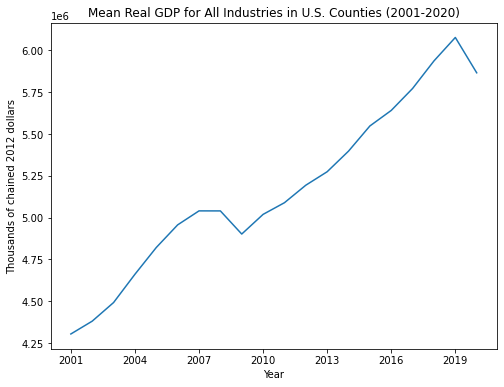

In [42]:
plt.figure(figsize=(8, 6))
plt.plot(rgdp_county_allindustry_mean["year"], rgdp_county_allindustry_mean["value"])
plt.xticks(np.arange(2001, 2021, 3))
plt.xlabel("Year")
plt.ylabel("Thousands of chained 2012 dollars")
plt.title("Mean Real GDP for All Industries in U.S. Counties (2001-2020)")
plt.show()

#### Aggregate and Take Median: `pd.groupby().median()`

In [43]:
rgdp_county_allindustry_median = rgdp_county_allindustry.groupby("year").median().reset_index()
rgdp_county_allindustry_median[:10]

,year,GeoFIPS,Region,LineCode,value
0,2001,29156.0,5.0,1.0,763212.5
1,2002,29156.0,5.0,1.0,783678.0
2,2003,29156.0,5.0,1.0,789646.5
3,2004,29156.0,5.0,1.0,825469.0
4,2005,29156.0,5.0,1.0,839073.5
5,2006,29156.0,5.0,1.0,866372.0
6,2007,29156.0,5.0,1.0,860042.5
7,2008,29156.0,5.0,1.0,854878.0
8,2009,29156.0,5.0,1.0,841094.5
9,2010,29156.0,5.0,1.0,867257.5


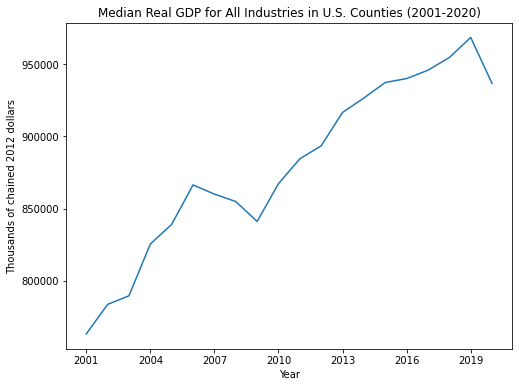

In [44]:
plt.figure(figsize=(8, 6))
plt.plot(rgdp_county_allindustry_median["year"], rgdp_county_allindustry_median["value"])
plt.xticks(np.arange(2001, 2021, 3))
plt.xlabel("Year")
plt.ylabel("Thousands of chained 2012 dollars")
plt.title("Median Real GDP for All Industries in U.S. Counties (2001-2020)")
plt.show()

## Part 7: Changes and percent changes

Analyzing raw changes and percent changes of economic data is pertinent to many economic research and studies. Pandas also provides convenience methods for us to obtain raws changes and percent changes between rows of the dataframe easily. 

In this part, we will use [`pd.DataFrame.diff`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.diff.html) and [`pd.DataFrame.pct_change`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html) methods to see how median county level real GDP has changed in each region in U.S. during the past 20 years. Bureau of Economic Analysis categorizes all states into eight big regions, and the eight regions are shown below. 

<img src="../assets/BEA_regions_iowa_state.jpg" width="600">
</br>
<center>U.S. Bureau of Economic Analysis Regions Reference Map</center>
<center>Source: <a href="https://www.icip.iastate.edu/maps/refmaps/bea">Iowa State University</a></center>

In [45]:
bea_regions = {
               1: "New England", 
               2: "Mideast", 
               3: "Great Lakes", 
               4: "Plains", 
               5: "Southeast", 
               6: "Southwest", 
               7: "Rocky Mountains", 
               8: "Far West"
              }

First we will look at the median county real GDP in each BEA region. 

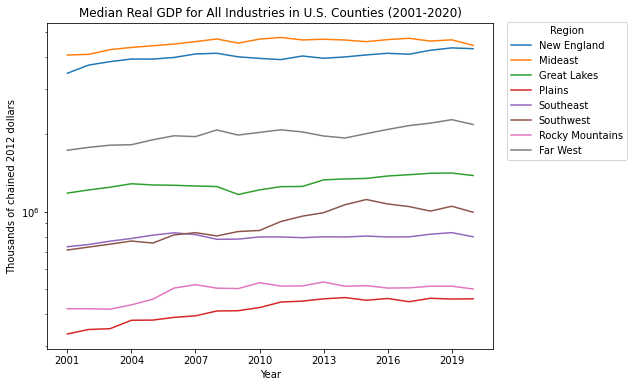

In [46]:
plt.figure(figsize=(8, 6))
for region in np.sort(rgdp_county_allindustry["Region"].unique()):
    rgdp_county_allindustry_region = rgdp_county_allindustry[rgdp_county_allindustry["Region"] == region]\
                                        .groupby("year").median()\
                                        .reset_index()
    plt.plot(rgdp_county_allindustry_region["year"], 
             rgdp_county_allindustry_region["value"], 
             label=bea_regions[region])
plt.xticks(np.arange(2001, 2021, 3))
plt.xlabel("Year")
plt.ylabel("Thousands of chained 2012 dollars")
plt.title("Median Real GDP for All Industries in U.S. Counties (2001-2020)")
plt.legend(title="Region", loc=(1.03, 0.58))
plt.yscale("log")
plt.show()

Now, we want to find the percent changes of median real GDP in each region with `pd.DataFrame.pct_change`. Let's first work with the New England region (coded as 1 in the dataset) as an example. 

In [47]:
rgdp_county_allindustry_region = rgdp_county_allindustry[rgdp_county_allindustry["Region"] == 1]\
                                        .groupby("year").median()\
                                        .reset_index()

rgdp_county_allindustry_region.pct_change()

,year,GeoFIPS,Region,LineCode,value
0,NaN,NaN,NaN,NaN,NaN
1,0.000500,0.0,0.0,0.0,0.076033
2,0.000500,0.0,0.0,0.0,0.031355
3,0.000499,0.0,0.0,0.0,0.023530
4,0.000499,0.0,0.0,0.0,-0.000360
5,0.000499,0.0,0.0,0.0,0.014709
6,0.000499,0.0,0.0,0.0,0.031703
7,0.000498,0.0,0.0,0.0,0.006298
8,0.000498,0.0,0.0,0.0,-0.031381
9,0.000498,0.0,0.0,0.0,-0.014080


Here all columns are converted to percent changes. The column we are concerned about is the "value" column. Note that they are not in percentages (i.e. 0.01 represents 1%, not 0.01%), so if we want them in percentages, we will have to multiply the column by 100. 

Now we will make a plot for all regions. 

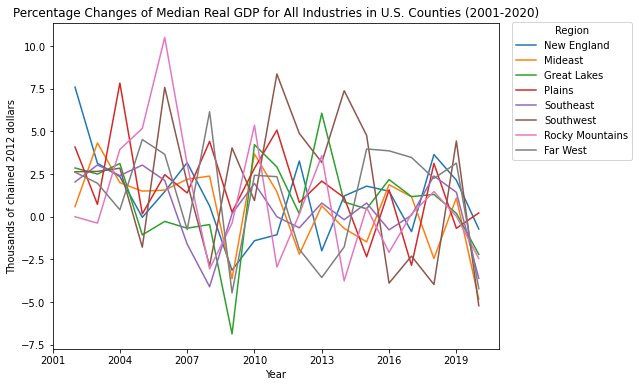

In [48]:
plt.figure(figsize=(8, 6))
for region in np.sort(rgdp_county_allindustry["Region"].unique()):
    rgdp_county_allindustry_region = rgdp_county_allindustry[rgdp_county_allindustry["Region"] == region]\
                                        .groupby("year").median()\
                                        .reset_index()
    plt.plot(rgdp_county_allindustry_region["year"][1:], 
             rgdp_county_allindustry_region.pct_change()["value"][1:] * 100, 
             label=bea_regions[region]
            )
plt.xticks(np.arange(2001, 2021, 3))
plt.xlabel("Year")
plt.ylabel("Thousands of chained 2012 dollars")
plt.title("Percentage Changes of Median Real GDP for All Industries in U.S. Counties (2001-2020)")
plt.legend(title="Region", loc=(1.03, 0.58))
plt.show()

## Part 8: Merge

To combine data on common columns or indices, the first technique that we will learn is `merge`. We can use `merge` anytime we want to join two dataframe that has one or more common columns. With `merge`, we can combine dataframe based on one or more keys, similar to what we would do in a relational database. 

In this section, we will combine our real GDP dataframe with another dataframe that contains the geographical data of each county, so that we can make some beautiful and informative visualizations in the next section. 

First, we will import the new dataset. 

In [49]:
county_geo = pd.read_csv("../data/uscounties_geo.csv")[["county_fips", "lat", "lng", "population"]]
county_geo

,county_fips,lat,lng,population
0,6037,34.3209,-118.2247,10040682
1,17031,41.8401,-87.8168,5169517
2,48201,29.8578,-95.3936,4680609
3,4013,33.3490,-112.4915,4412779
4,6073,33.0343,-116.7350,3323970
...,...,...,...,...
3138,35021,35.8579,-103.8202,432
3139,31117,41.5682,-101.0604,420
3140,48261,26.9285,-97.7017,391
3141,48269,33.6165,-100.2558,279


Notice that the new dataset shares a common column "county_fips" with our real GDP dataframe "GeoFIPS". ([What is GeoFIPS?](https://en.wikipedia.org/wiki/FIPS_county_code)) So we will merge the two dataframe based on this key. 

In [50]:
rgdp_county_allindustry_geo = rgdp_county_allindustry.merge(county_geo, left_on="GeoFIPS", right_on="county_fips")
rgdp_county_allindustry_geo

,GeoFIPS,GeoName,Region,LineCode,year,value,county_fips,lat,lng,population
0,1001,"Autauga, AL",5,1,2001,949800,1001,32.5349,-86.6427,55639
1,1001,"Autauga, AL",5,1,2002,984039,1001,32.5349,-86.6427,55639
2,1001,"Autauga, AL",5,1,2003,1008032,1001,32.5349,-86.6427,55639
3,1001,"Autauga, AL",5,1,2004,1170278,1001,32.5349,-86.6427,55639
4,1001,"Autauga, AL",5,1,2005,1195319,1001,32.5349,-86.6427,55639
...,...,...,...,...,...,...,...,...,...,...
61635,56045,"Weston, WY",7,1,2016,305446,56045,43.8405,-104.5678,6942
61636,56045,"Weston, WY",7,1,2017,300909,56045,43.8405,-104.5678,6942
61637,56045,"Weston, WY",7,1,2018,315332,56045,43.8405,-104.5678,6942
61638,56045,"Weston, WY",7,1,2019,322576,56045,43.8405,-104.5678,6942


## Part 9: Making simple visualizations!

Now we have cleaned up our dataset and computed the percent change of GDP for each county. It's time to use this data to show how economic performance vary across different regions! 

In [51]:
rgdp_county_allindustry_geo_chg = rgdp_county_allindustry_geo[rgdp_county_allindustry_geo["year"] != 2001].copy()
rgdp_county_allindustry_geo_chg["value"] = rgdp_county_allindustry_geo[["value"]].pct_change().drop(index=np.arange(0, 61640, 20), axis=0)
rgdp_county_allindustry_geo_chg

,GeoFIPS,GeoName,Region,LineCode,year,value,county_fips,lat,lng,population
1,1001,"Autauga, AL",5,1,2002,0.036049,1001,32.5349,-86.6427,55639
2,1001,"Autauga, AL",5,1,2003,0.024382,1001,32.5349,-86.6427,55639
3,1001,"Autauga, AL",5,1,2004,0.160953,1001,32.5349,-86.6427,55639
4,1001,"Autauga, AL",5,1,2005,0.021397,1001,32.5349,-86.6427,55639
5,1001,"Autauga, AL",5,1,2006,0.068413,1001,32.5349,-86.6427,55639
...,...,...,...,...,...,...,...,...,...,...
61635,56045,"Weston, WY",7,1,2016,-0.156380,56045,43.8405,-104.5678,6942
61636,56045,"Weston, WY",7,1,2017,-0.014854,56045,43.8405,-104.5678,6942
61637,56045,"Weston, WY",7,1,2018,0.047931,56045,43.8405,-104.5678,6942
61638,56045,"Weston, WY",7,1,2019,0.022973,56045,43.8405,-104.5678,6942


To eliminate some outliers--some have extreme values for changes between years--we will only work with the data with GDP changes from 10th percentile to 90th percentile. The following function will plot the changes for a given year and a given industry. 

In [52]:
def plot_counties(data, year, industry="All Industries"):
    
    MIN = np.nanpercentile(data["value"], 10)
    MAX = np.nanpercentile(data["value"], 90)
    
    rgdp_county_year = data[data["year"] == year] 
    rgdp_county_year = rgdp_county_year[(rgdp_county_year["value"] < MAX) & (rgdp_county_year["value"] > MIN)]
    
    plt.figure(figsize=(16, 9))
    plt.xlim([-170, -50])
    plt.ylim([10, 70])
    plt.scatter(rgdp_county_year["lng"], rgdp_county_year["lat"], 
                c=rgdp_county_year["value"], cmap="coolwarm", s=20, alpha=0.8)
    plt.colorbar()
    plt.title(f"Percentage Changes of Real GDP for {industry} in U.S. Counties ({year})", size=14)
    plt.tight_layout()
    plt.show()

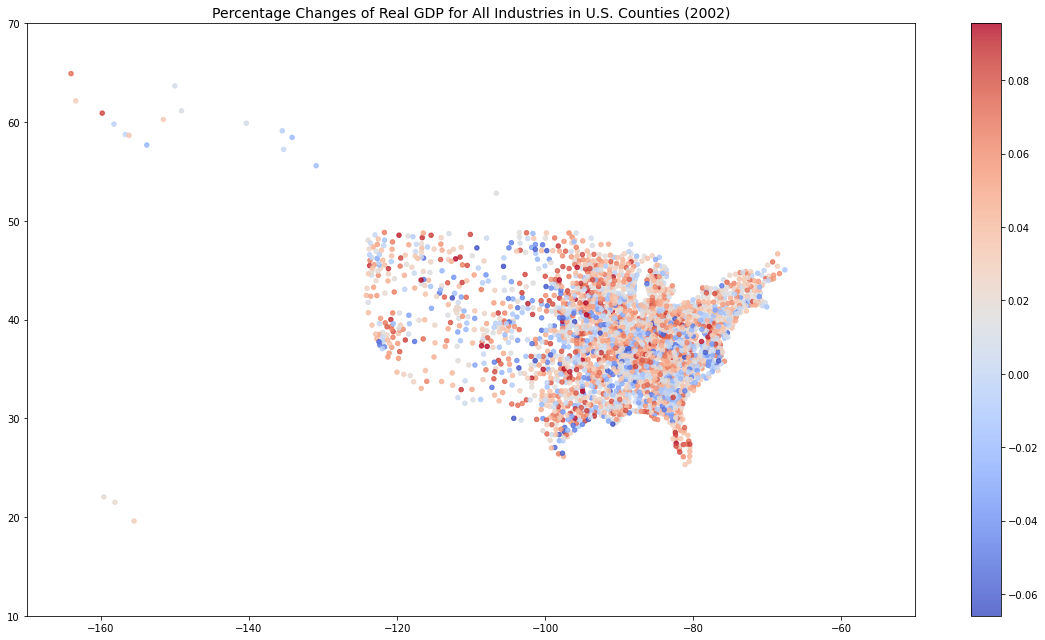

In [53]:
plot_counties(rgdp_county_allindustry_geo_chg, 2002)

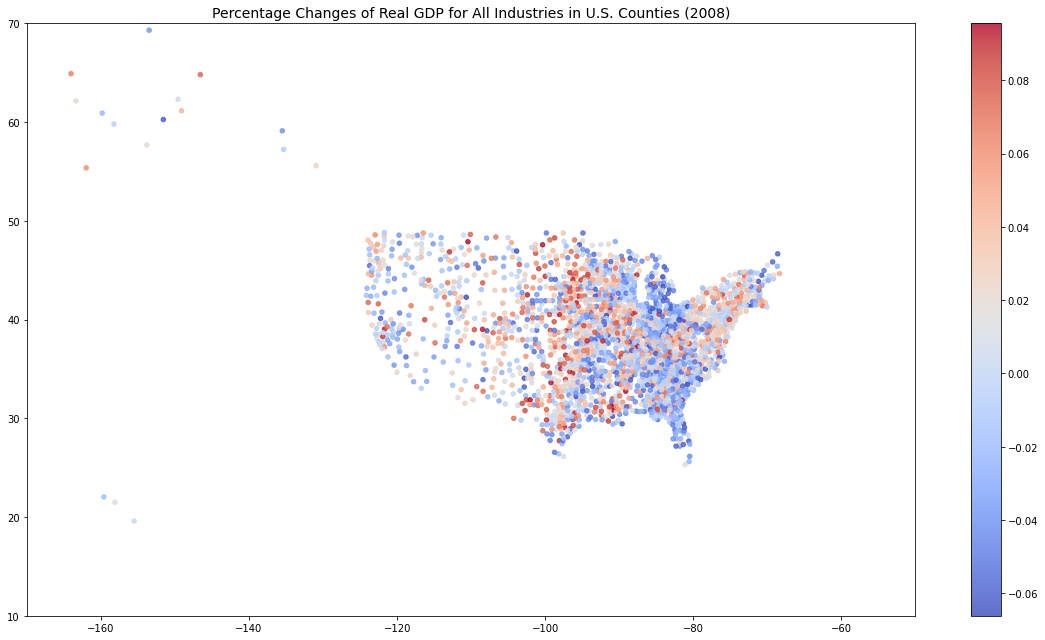

In [54]:
plot_counties(rgdp_county_allindustry_geo_chg, 2008)

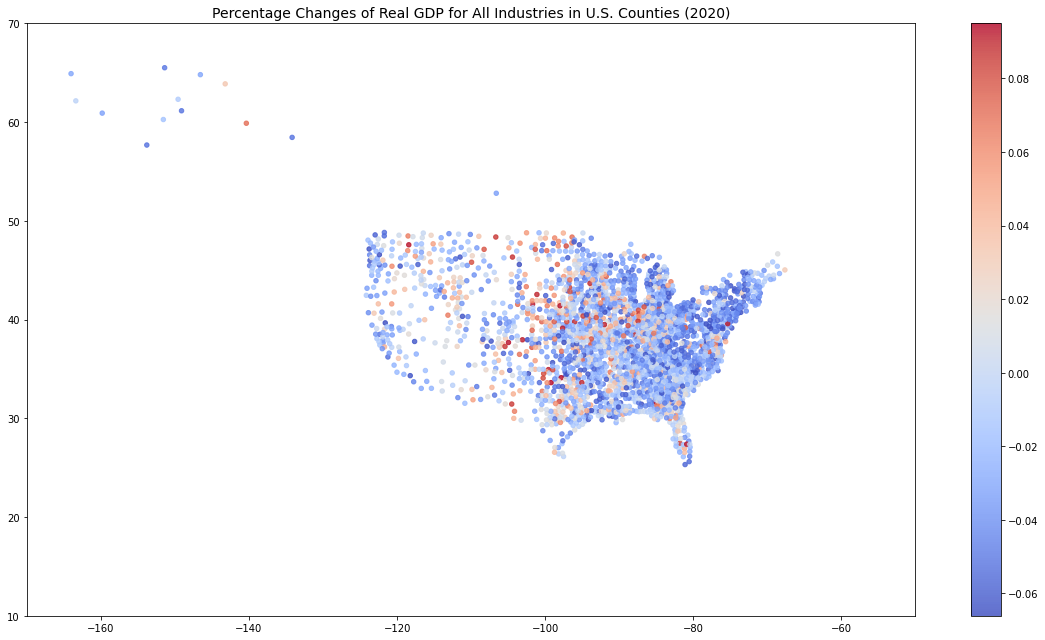

In [55]:
plot_counties(rgdp_county_allindustry_geo_chg, 2020)

We can also make some widgets!

In [56]:
def plot_counties_widgets(industry, year):
    rgdp_county_industry = rgdp_county[rgdp_county["Description"] == industry].drop("Description", axis=1)
    rgdp_county_industry_geo = rgdp_county_industry.merge(county_geo, left_on="GeoFIPS", right_on="county_fips")
    rgdp_county_industry_geo_chg = rgdp_county_industry_geo[rgdp_county_industry_geo["year"] != 2001].copy()
    
    pct_chg_vals = rgdp_county_industry_geo[["value"]].pct_change()
    rgdp_county_industry_geo_chg["value"] = pct_chg_vals.drop(index=np.arange(0, len(pct_chg_vals), 20), axis=0)
    
    plot_counties(rgdp_county_industry_geo_chg, year, re.sub("  ", "", industry))

In [57]:
i = widgets.Dropdown(options=rgdp_county["Description"].unique(),
                     value="All industry total", 
                     description="Industry", 
                     layout={'width': 'max-content'})

t = widgets.IntSlider(min=2002, max=2020, step=1, 
                      description="Year", 
                      layout={'width': '300px'})

interact(plot_counties_widgets, industry=i, year=t);

interactive(children=(Dropdown(description='Industry', layout=Layout(width='max-content'), options=('All indus…

In [58]:
# DEBUG

In [59]:
# TODO: Analyze NaN problem

In [60]:
rgdp_county_industry = rgdp_county[rgdp_county["Description"] == '  Agriculture, forestry, fishing and hunting'].drop("Description", axis=1)
rgdp_county_industry_geo = rgdp_county_industry.merge(county_geo, left_on="GeoFIPS", right_on="county_fips")
rgdp_county_industry_geo_chg = rgdp_county_industry_geo[rgdp_county_industry_geo["year"] != 2001].copy()

pct_chg_vals = rgdp_county_industry_geo[["value"]].pct_change()
rgdp_county_industry_geo_chg["value"] = pct_chg_vals.drop(index=np.arange(0, len(pct_chg_vals), 20), axis=0)
rgdp_county_industry_geo_chg

,GeoFIPS,GeoName,Region,LineCode,year,value,county_fips,lat,lng,population
1,1001,"Autauga, AL",5,3,2002,-0.195591,1001,32.5349,-86.6427,55639
2,1001,"Autauga, AL",5,3,2003,1.211205,1001,32.5349,-86.6427,55639
3,1001,"Autauga, AL",5,3,2004,0.249418,1001,32.5349,-86.6427,55639
4,1001,"Autauga, AL",5,3,2005,0.184277,1001,32.5349,-86.6427,55639
5,1001,"Autauga, AL",5,3,2006,0.193489,1001,32.5349,-86.6427,55639
...,...,...,...,...,...,...,...,...,...,...
22915,56041,"Uinta, WY",7,3,2016,0.016562,56041,41.2876,-110.5476,20374
22916,56041,"Uinta, WY",7,3,2017,-0.145202,56041,41.2876,-110.5476,20374
22917,56041,"Uinta, WY",7,3,2018,0.260573,56041,41.2876,-110.5476,20374
22918,56041,"Uinta, WY",7,3,2019,1.316190,56041,41.2876,-110.5476,20374


In [61]:
rgdp_county_industry_geo_chg[rgdp_county_industry_geo_chg["value"] != rgdp_county_industry_geo_chg["value"]]

,GeoFIPS,GeoName,Region,LineCode,year,value,county_fips,lat,lng,population
428,1073,"Jefferson, AL",5,3,2009,NaN,1073,33.5543,-86.8964,658615
808,2158,"Kusilvak Census Area, AK*",8,3,2009,NaN,2158,62.1550,-163.3826,8298
2379,8031,"Denver, CO",7,3,2020,NaN,8031,39.7620,-104.8758,715878
8548,22055,"Lafayette, LA",5,3,2009,NaN,22055,30.2068,-92.0639,243692


In [62]:
rgdp_melted[rgdp_melted["value"] != rgdp_melted["value"]]

,GeoFIPS,GeoName,Region,LineCode,Description,year,value


In [63]:
rgdp_county[rgdp_county["value"] != rgdp_county["value"]]

,GeoFIPS,GeoName,Region,LineCode,Description,year,value


In [64]:
rgdp_county_industry = rgdp_county[rgdp_county["Description"] == industry].drop("Description", axis=1)
rgdp_county_industry_geo = rgdp_county_industry.merge(county_geo, left_on="GeoFIPS", right_on="county_fips")
rgdp_county_industry_geo[rgdp_county_industry_geo["value"] != rgdp_county_industry_geo["value"]]

,GeoFIPS,GeoName,Region,LineCode,year,value,county_fips,lat,lng,population
